<a href="https://colab.research.google.com/github/ShimilSBabu/Training/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of linear regression


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
class Model(object):
  def __init__(self):
    self.weight = tf.Variable(random.random())
    self.bias = tf.Variable(random.random())

  def __call__(self, x):
    return self.weight * x + self.bias

In [ ]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [ ]:
TRUE_w = 3.0
TRUE_b = 2.0
EXAMPLE_COUNT = 1000
xs = tf.random.normal(shape = [EXAMPLE_COUNT])
ys = TRUE_w * xs + TRUE_b

In [ ]:
def plot_data(inputs, outputs, predicted_outputs):
    real = plt.scatter(inputs, outputs, c = 'b')
    predicted = plt.scatter(inputs, predicted_outputs, c = 'r')
    plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
    plt.show()

In [ ]:
model = Model()

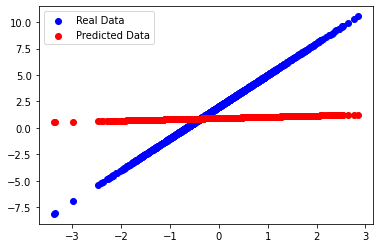

Current Loss is : 9.545158386230469


In [ ]:
plot_data(xs, ys, model(xs))
current_loss = loss(model(xs), ys).numpy()
print(f'Current Loss is : {current_loss}')

In [ ]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
      current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.weight, model.bias])
    model.weight.assign_sub(learning_rate * dw)
    model.bias.assign_sub(learning_rate * db)

    return current_loss

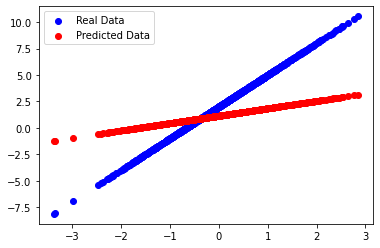

Epoch : 0 Weight : 0.11851092427968979 Bias : 0.9217779040336609 Current Loss : 9.545158386230469 





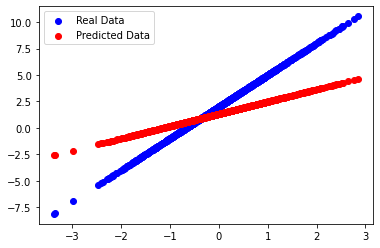

Epoch : 1 Weight : 0.6983245611190796 Bias : 1.1427943706512451 Current Loss : 6.083136081695557 





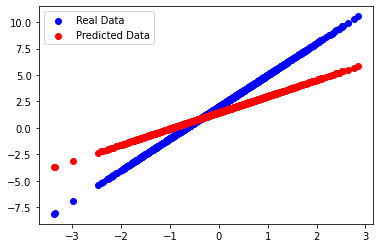

Epoch : 2 Weight : 1.161460518836975 Bias : 1.3185265064239502 Current Loss : 3.876823902130127 





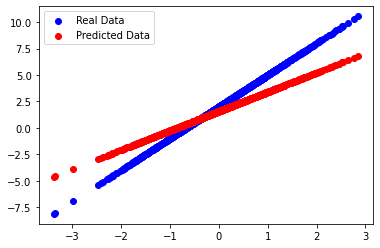

Epoch : 3 Weight : 1.5313997268676758 Bias : 1.4582488536834717 Current Loss : 2.4707493782043457 





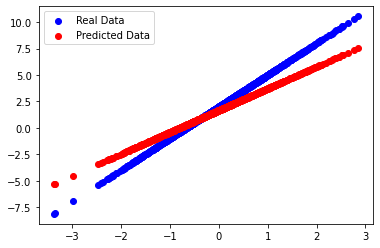

Epoch : 4 Weight : 1.8268972635269165 Bias : 1.569337010383606 Current Loss : 1.5746550559997559 





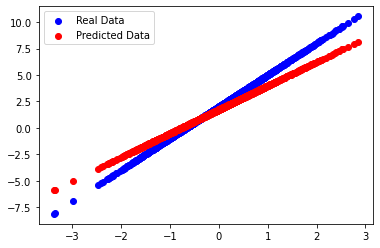

Epoch : 5 Weight : 2.0629336833953857 Bias : 1.6576566696166992 Current Loss : 1.003567099571228 





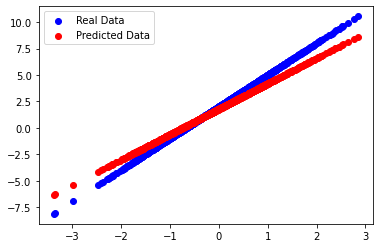

Epoch : 6 Weight : 2.2514748573303223 Bias : 1.727872371673584 Current Loss : 0.6396047472953796 





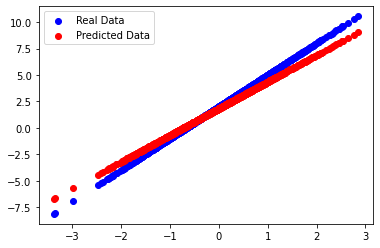

Epoch : 7 Weight : 2.40207839012146 Bias : 1.7836934328079224 Current Loss : 0.40764403343200684 





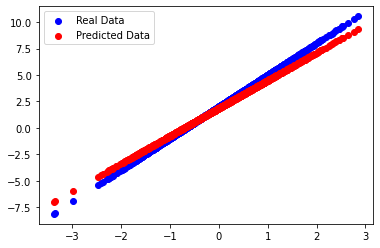

Epoch : 8 Weight : 2.522378444671631 Bias : 1.8280694484710693 Current Loss : 0.2598094046115875 





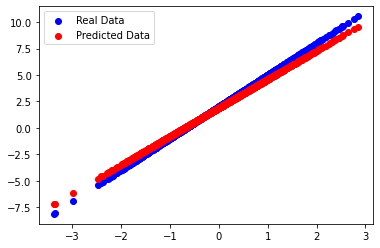

Epoch : 9 Weight : 2.6184728145599365 Bias : 1.863345980644226 Current Loss : 0.16558963060379028 





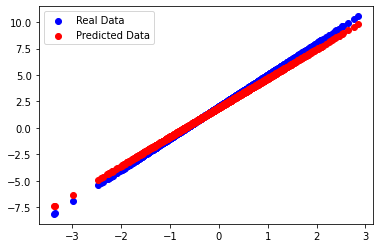

Epoch : 10 Weight : 2.695232391357422 Bias : 1.8913880586624146 Current Loss : 0.10553963482379913 





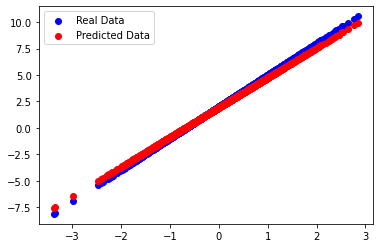

Epoch : 11 Weight : 2.756547689437866 Bias : 1.9136786460876465 Current Loss : 0.067267045378685 





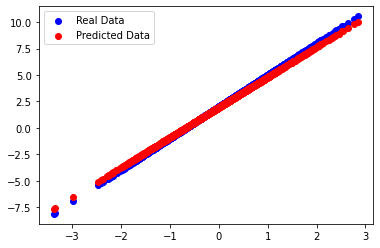

Epoch : 12 Weight : 2.8055262565612793 Bias : 1.9313968420028687 Current Loss : 0.04287397488951683 





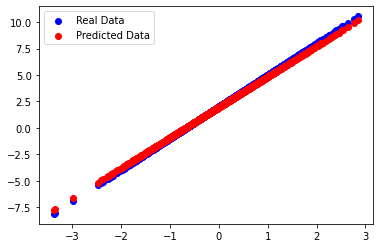

Epoch : 13 Weight : 2.8446505069732666 Bias : 1.9454799890518188 Current Loss : 0.02732684649527073 





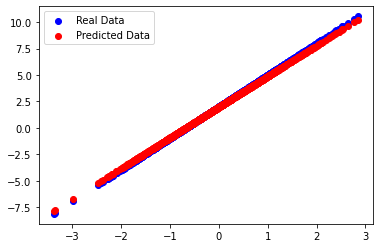

Epoch : 14 Weight : 2.8759031295776367 Bias : 1.9566736221313477 Current Loss : 0.017417678609490395 





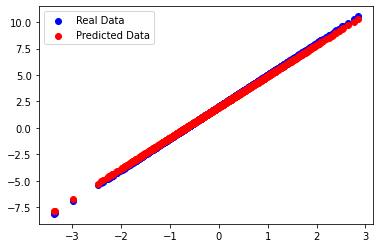

Epoch : 15 Weight : 2.9008681774139404 Bias : 1.9655702114105225 Current Loss : 0.011101831682026386 





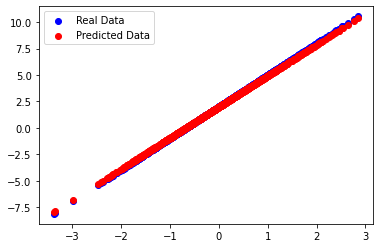

Epoch : 16 Weight : 2.9208104610443115 Bias : 1.9726409912109375 Current Loss : 0.0070762718096375465 





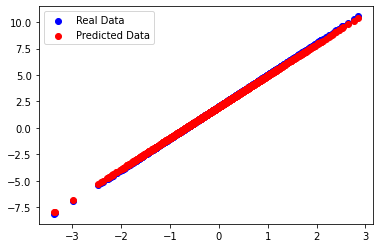

Epoch : 17 Weight : 2.9367406368255615 Bias : 1.9782603979110718 Current Loss : 0.004510452039539814 





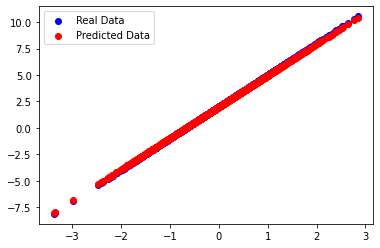

Epoch : 18 Weight : 2.9494659900665283 Bias : 1.9827262163162231 Current Loss : 0.0028750142082571983 





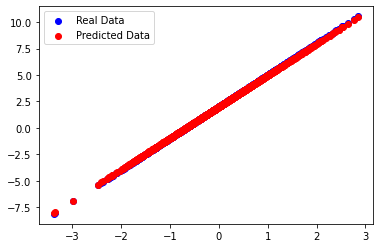

Epoch : 19 Weight : 2.9596314430236816 Bias : 1.9862751960754395 Current Loss : 0.0018325763521715999 





In [ ]:
list_weight, list_bias = [], []
epochs = range(20)
losses = []

for epoch in epochs:
  list_weight.append(model.weight.numpy())
  list_bias.append(model.bias.numpy())
  current_loss = train(model, xs, ys, learning_rate = 0.1)
  losses.append(current_loss)
  plot_data(xs, ys, model(xs))
  print(f'Epoch : {epoch} Weight : {list_weight[-1]} Bias : {list_bias[-1]} Current Loss : {current_loss} \n\n\n')

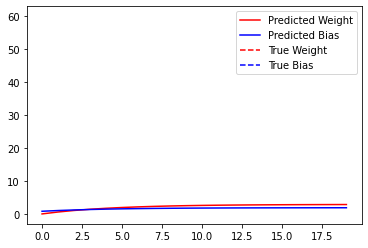

In [ ]:
plt.plot(epochs, list_weight, 'r', 
         epochs, list_bias, 'b', )
plt.plot(TRUE_w * len(epochs), 'r--', 
         TRUE_b * len(epochs), 'b--', )
plt.legend(['Predicted Weight', 'Predicted Bias', 'True Weight', 'True Bias'])
plt.show()